In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from dataScipy import DataScience as DS

### <span style="color:RED">1: Transformations: Differences</span>

### <span style="color:RED">1.a: Download The Data</span>

In [2]:
# Load the data
METRO = pd.read_csv('Haciosman_2022.csv', header=None)
METRO.columns = ['Days', 'Passengers']
PASSENGERS = METRO['Passengers'].values
METRO_DAYS = METRO['Days'].values

### <span style="color:RED">1.b: Plot The Data</span>

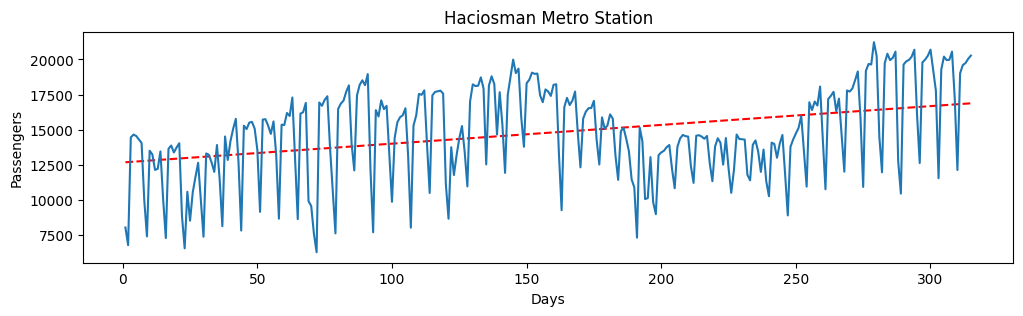

In [3]:
z = np.polyfit(METRO_DAYS, PASSENGERS, 1)
p = np.poly1d(z)

plt.figure(figsize=(12, 3))
plt.plot(METRO_DAYS, p(METRO_DAYS), 'r--')
plt.plot(METRO_DAYS, PASSENGERS)
plt.xlabel('Days')
plt.ylabel('Passengers')
plt.title('Haciosman Metro Station')
plt.show()

### <span style="color:RED">1.c: Take a Difference of The Data</span>

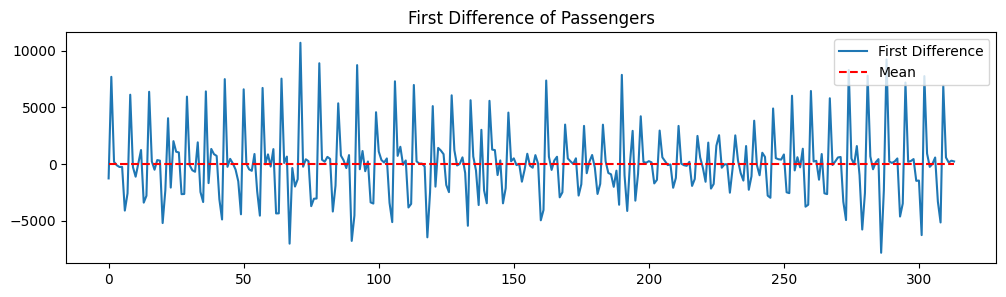

Mean of First Difference of Passengers:  39.0828


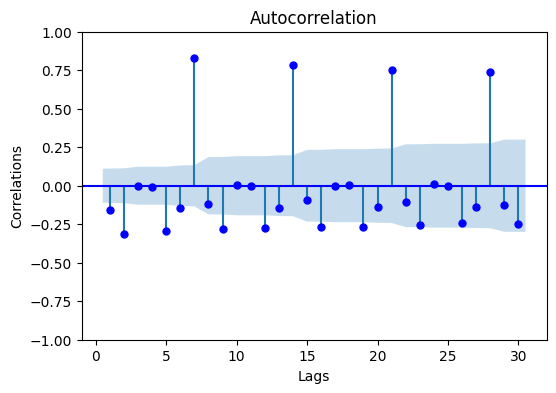

In [4]:
PASSENGERS_FIRST_DIFF = DS.take_diff_of_series(PASSENGERS)

mean_of_PASSENGERS_FIRST_DIFF = np.mean(PASSENGERS_FIRST_DIFF)

plt.figure(figsize=(12, 3))
plt.plot(PASSENGERS_FIRST_DIFF)
plt.plot([mean_of_PASSENGERS_FIRST_DIFF] * len(PASSENGERS_FIRST_DIFF), 'r--')
plt.title('First Difference of Passengers')
plt.legend(['First Difference', 'Mean'], loc='upper right')
plt.show()

print('Mean of First Difference of Passengers: ', round(mean_of_PASSENGERS_FIRST_DIFF, 4))

DS.plot_autocorrelation(PASSENGERS_FIRST_DIFF)



### <span style="color:RED">2: Transformations: Seasonal</span>

### <span style="color:RED">2.a: Look for Seasonality</span>

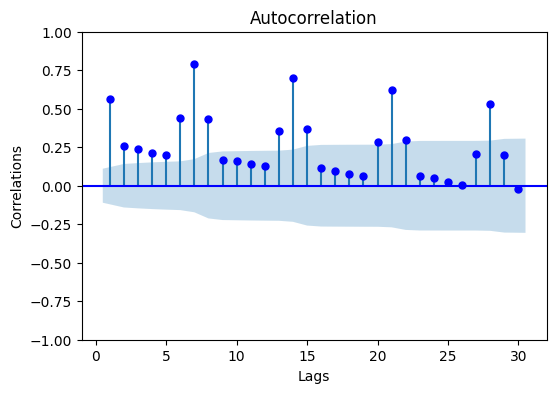

In [5]:
DS.plot_autocorrelation(PASSENGERS)

### <span style="color:RED">2.b: Plot The Data</span>

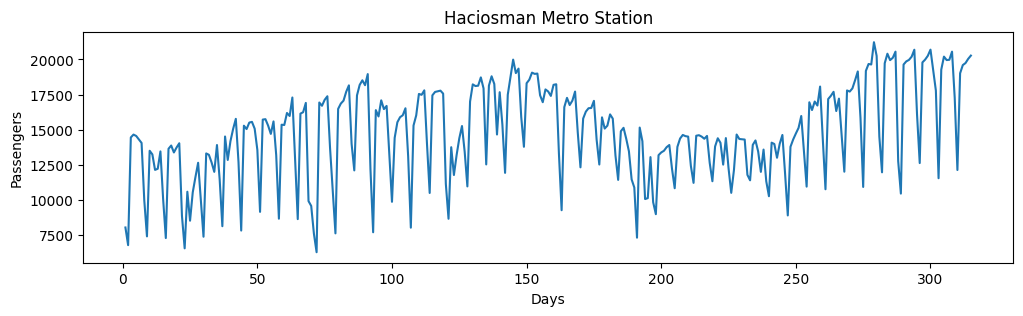

In [6]:
plt.figure(figsize=(12, 3))
plt.plot(METRO_DAYS, PASSENGERS)
plt.xlabel('Days')
plt.ylabel('Passengers')
plt.title('Haciosman Metro Station')
plt.show()

### <span style="color:RED">2.c: Take a Seasonal Difference of The Data</span>

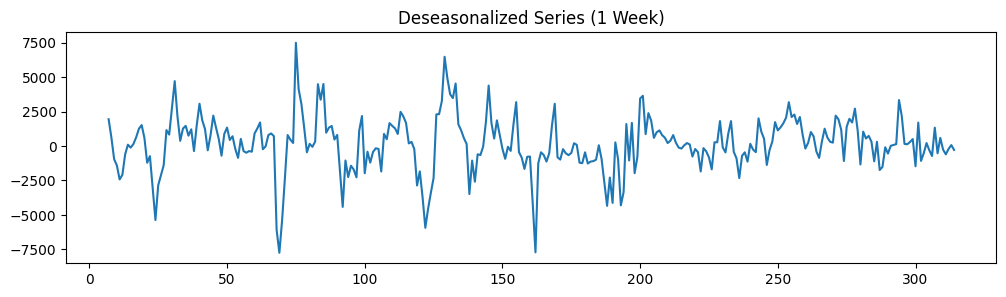

In [7]:
PASSENGERS_DESEASONALIZED_1WEEK = DS.deseasonalize_series(PASSENGERS, 7)

plt.figure(figsize=(12, 3))
plt.plot(PASSENGERS_DESEASONALIZED_1WEEK)
plt.title('Deseasonalized Series (1 Week)')
plt.show()


### <span style="color:RED">3: Naive Forecast</span>

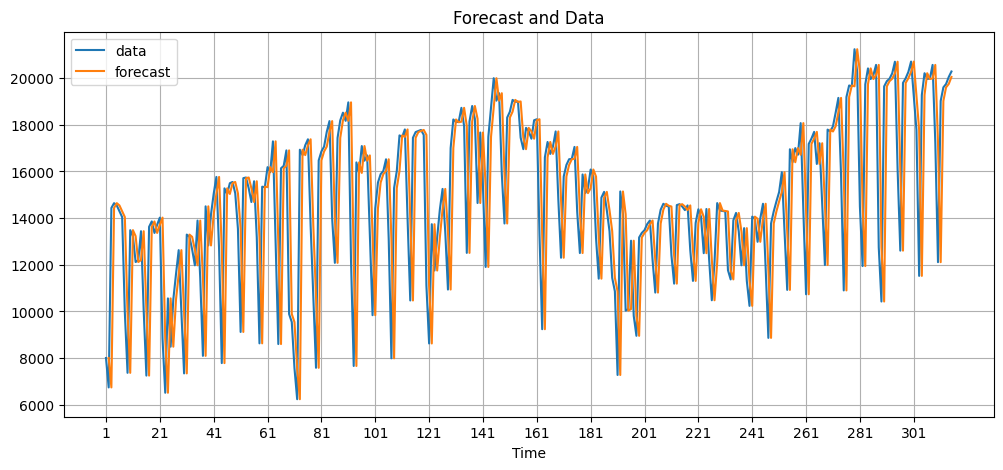

Error Summary
-------------
MAE: 2091.6815
MAPE: 15.9080
MSE: 9396116.0255
RMSE: 3065.3085


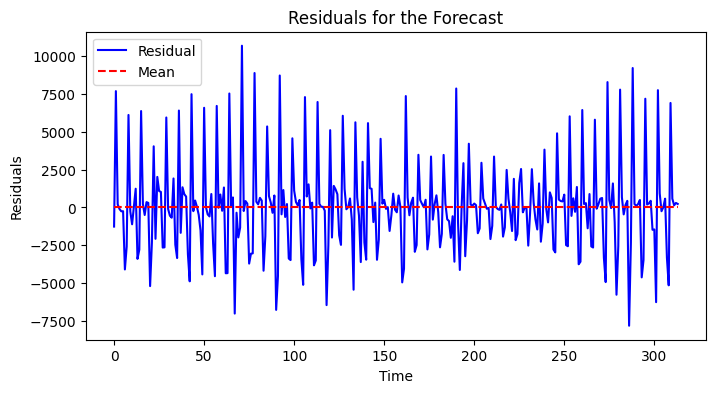

Mean of Residual:   39.0828
S.D. of Residual:   3069.9517
Half Width :        340.8767   (degree of freedom = 313, Confidence Level = 0.95)
p-value :           0.8217


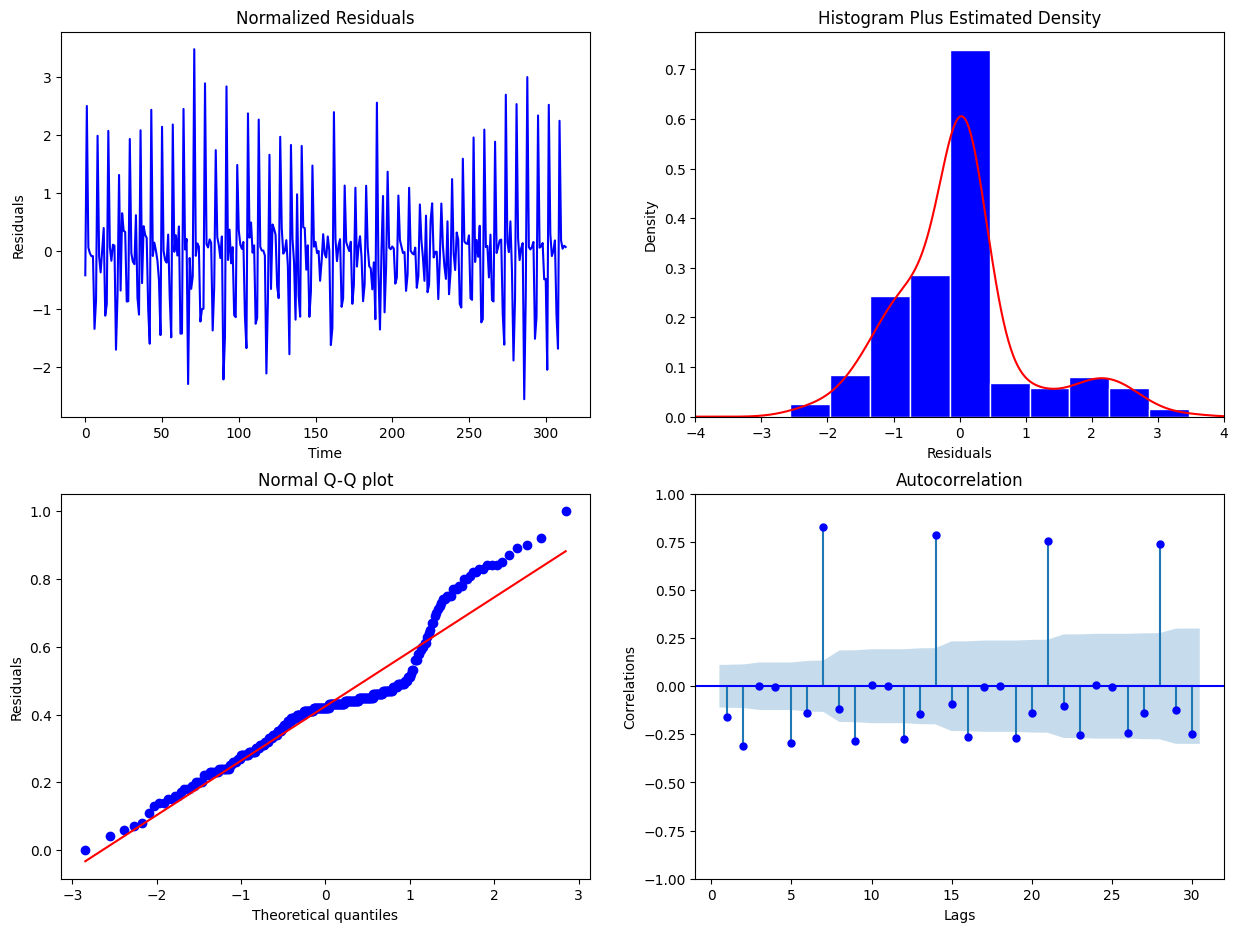

In [8]:
NAIVE_FORECAST = DS.make_forecast_for_all_data(PASSENGERS, DS.naive_forecast)

DS.plot_forecasts(PASSENGERS, METRO_DAYS,  NAIVE_FORECAST, time_step=20)

DS.print_error_summary(PASSENGERS, NAIVE_FORECAST, MAE=DS.MAE, MAPE=DS.MAPE, MSE=DS.MSE, RMSE=DS.RMSE)
NAIVE_ERRORS = DS.get_all_residuals(PASSENGERS, NAIVE_FORECAST)
DS.plot_resids(NAIVE_ERRORS)
DS.print_resids_summary(NAIVE_ERRORS)

DS.show_all_normalized_resids_plots(NAIVE_ERRORS)


### <span style="color:RED">4: Exponential Smoothing Forecast</span>

In [9]:
alpha_values = np.arange(0.1, 1.0, 0.01)

es_forecasts = {}
for alpha in alpha_values:
    es_forecasts["ES({:.2f})".format(alpha)] = DS.make_forecast_for_all_data(PASSENGERS, DS.ES_forecast, alpha=alpha)

es_forecasts_errors_df = DS.compare_forecasts(PASSENGERS, es_forecasts, MAE=DS.MAE, MAPE=DS.MAPE, MSE=DS.MSE, RMSE=DS.RMSE)

miminum_rmse_df = es_forecasts_errors_df[es_forecasts_errors_df['RMSE'] == es_forecasts_errors_df['RMSE'].min()]
miminum_rmse_df

,MAE,MAPE,MSE,RMSE
ES(0.16),2307.94,18.02,7794230.45,2791.81


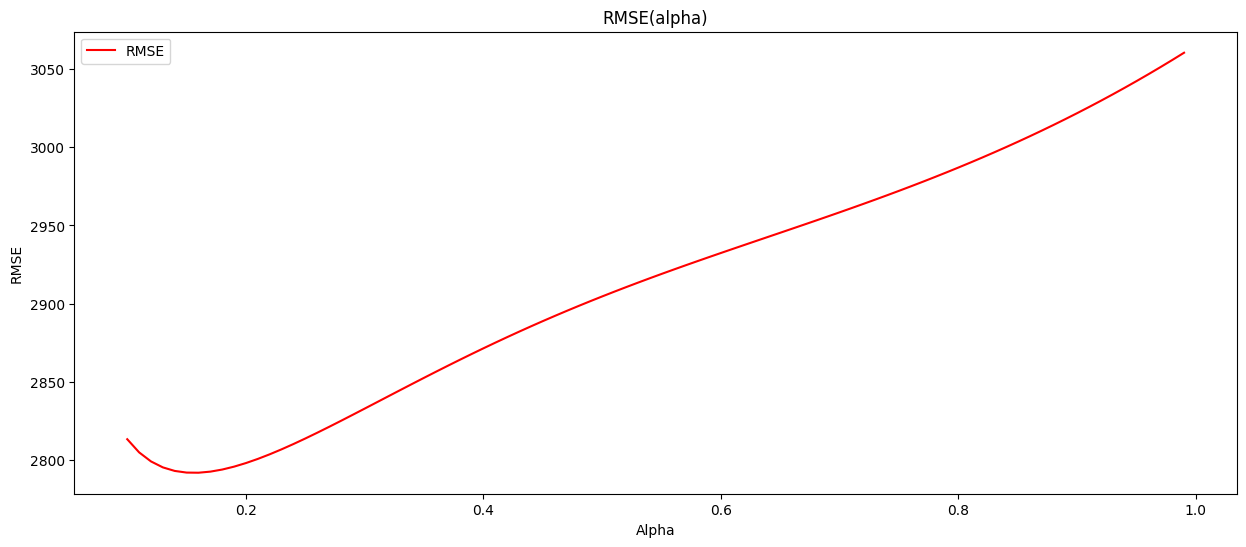

In [10]:
plt.figure(figsize = (15, 6))
plt.plot(alpha_values,es_forecasts_errors_df['RMSE'], 'r')
plt.xlabel("Alpha")
plt.ylabel("RMSE")
plt.title("RMSE(alpha)")
plt.legend(['RMSE'])
plt.show()

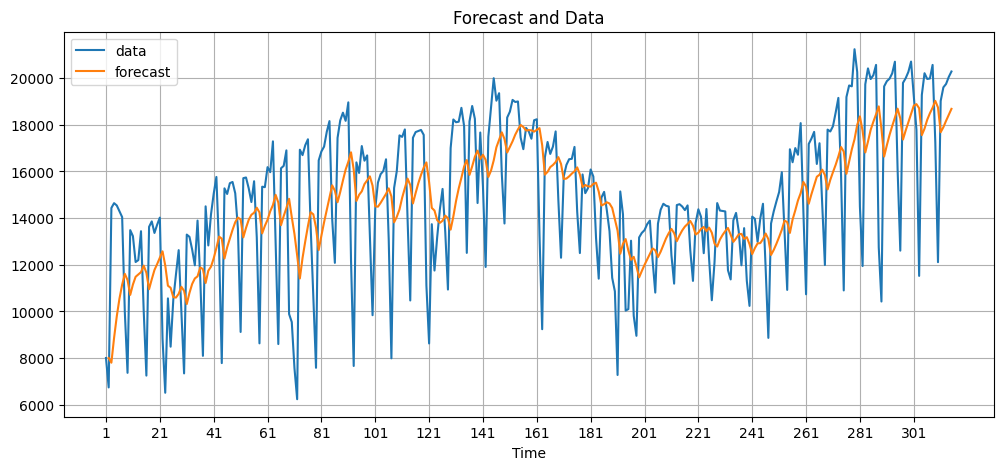

Error Summary
-------------
MAE: 2307.9442
MAPE: 18.0161
MSE: 7794230.4454
RMSE: 2791.8149


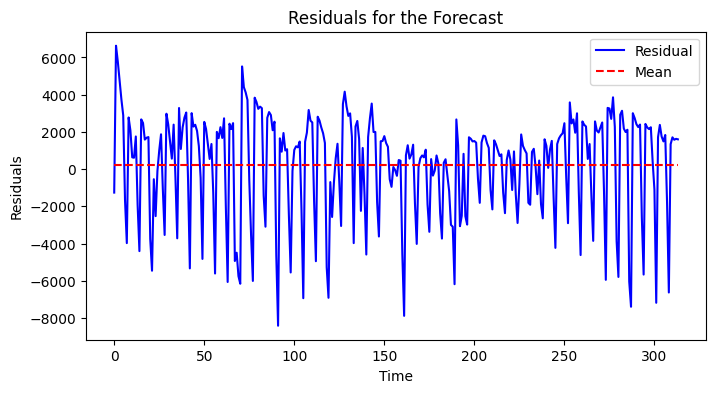

Mean of Residual:   217.5070
S.D. of Residual:   2787.7718
Half Width :        309.5445   (degree of freedom = 313, Confidence Level = 0.95)
p-value :           0.1678


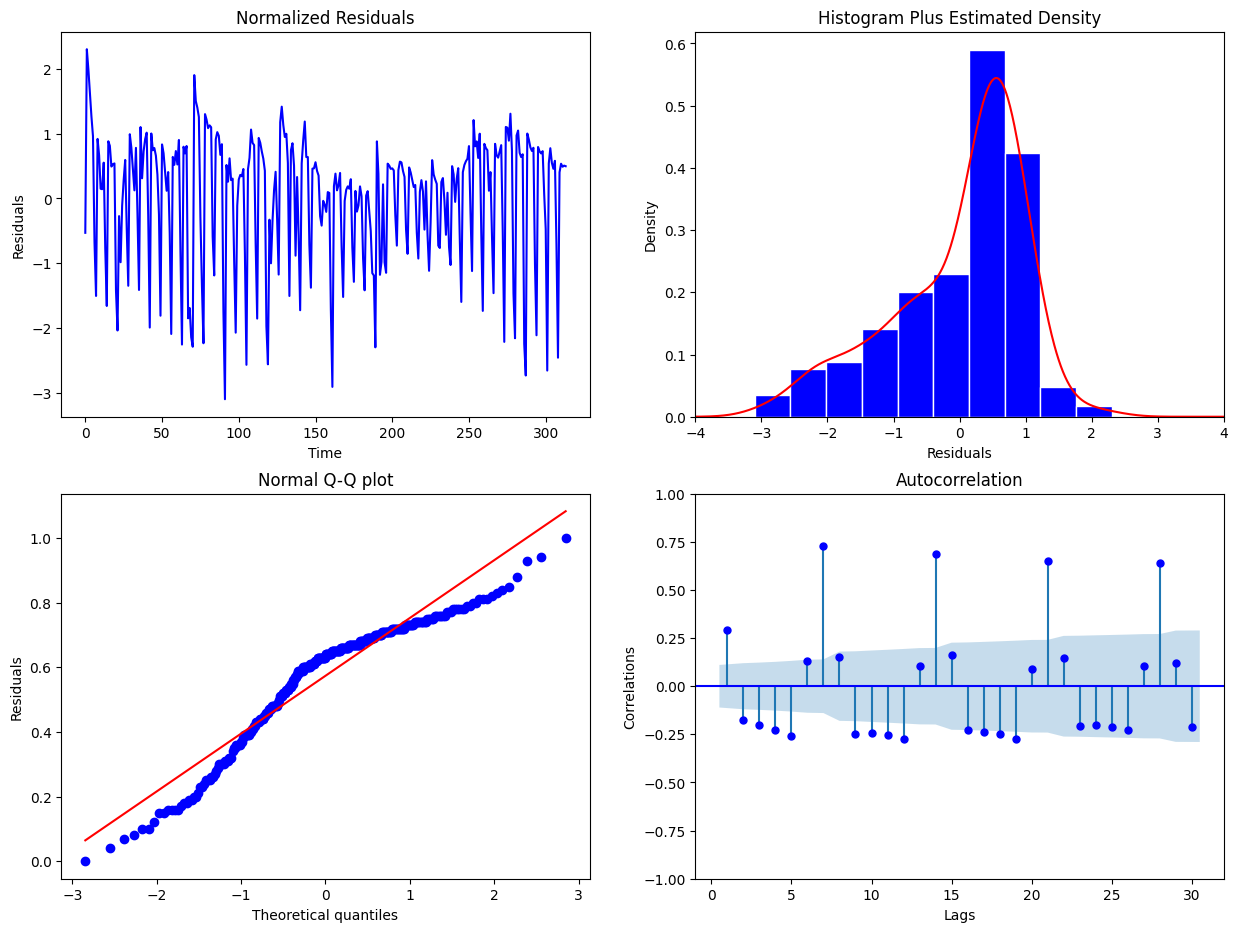

In [11]:
ES016_FORECAST = DS.make_forecast_for_all_data(PASSENGERS, DS.ES_forecast, alpha=0.16)

DS.plot_forecasts(PASSENGERS, METRO_DAYS,  ES016_FORECAST, time_step=20)

DS.print_error_summary(PASSENGERS, ES016_FORECAST, MAE=DS.MAE, MAPE=DS.MAPE, MSE=DS.MSE, RMSE=DS.RMSE)
ES016_ERRORS = DS.get_all_residuals(PASSENGERS, ES016_FORECAST)
DS.plot_resids(ES016_ERRORS)
DS.print_resids_summary(ES016_ERRORS)

DS.show_all_normalized_resids_plots(ES016_ERRORS)

### <span style="color:RED">5: Transformations: Log</span>

### <span style="color:RED">5.a: Download The Data</span>

In [12]:
COVID = pd.read_csv('covid_italy.csv', header=None)

COVID.columns = ['Days', 'Cases']
CASES = COVID['Cases'].values
COVID_DAYS = COVID['Days'].values

### <span style="color:RED">5.b: Plot The Data</span>

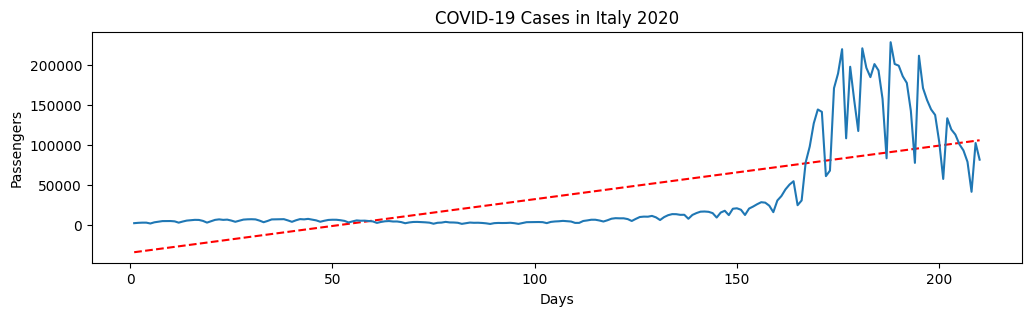

In [13]:
z = np.polyfit(COVID_DAYS, CASES, 1)
p = np.poly1d(z)

plt.figure(figsize=(12, 3))
plt.plot(COVID_DAYS, p(COVID_DAYS), 'r--')
plt.plot(COVID_DAYS, CASES)
plt.xlabel('Days')
plt.ylabel('Passengers')
plt.title('COVID-19 Cases in Italy 2020')
plt.show()

### <span style="color:RED">5.c: Take Log Transformations</span>

In [14]:
CASES_LOG = DS.take_log_of_series(CASES)

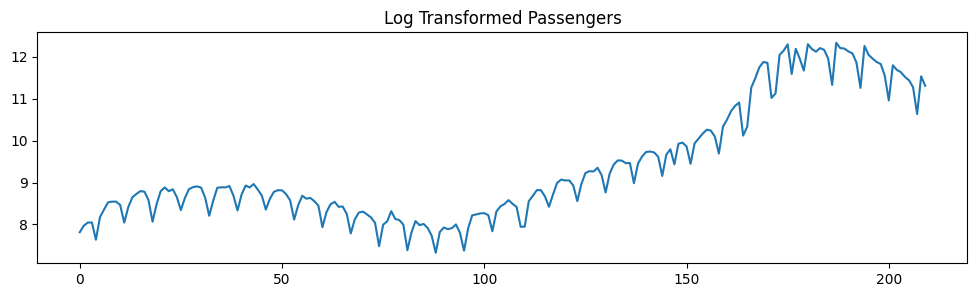

In [15]:
plt.figure(figsize=(12, 3))
plt.plot(CASES_LOG)
plt.title('Log Transformed Passengers')
plt.show()

### <span style="color:RED">5.d: Desasonalized The Logged Data</span>

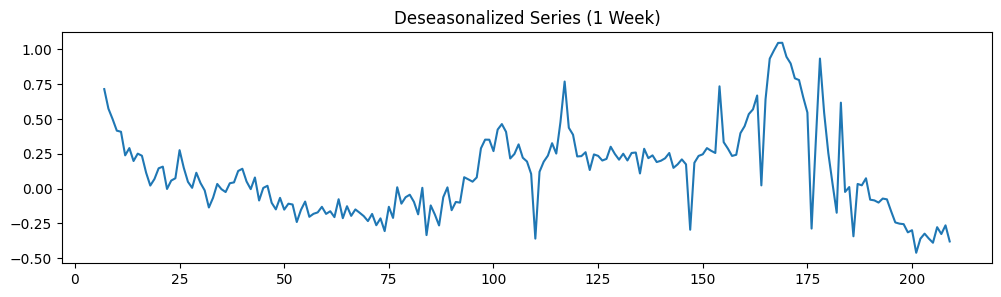

In [16]:
CASES_LOG_DEASEASONALIZED_1WEEK = DS.deseasonalize_series(CASES_LOG, 7) 

plt.figure(figsize=(12, 3))
plt.plot(CASES_LOG_DEASEASONALIZED_1WEEK)
plt.title('Deseasonalized Series (1 Week)')
plt.show()

### <span style="color:RED">6: Generate 500 realizations from an AR-1 process Yt = 200 + (0.9)Yt−1 + εt</span>

In [17]:
np.random.seed(123)
AR1_500_q6_phi_list = [0.9]
AR1_500_q6 = DS.generate_AR_process(200, AR1_500_q6_phi_list, errors=np.random.normal(0, 20, 501), lenght_of_series=500)


### <span style="color:RED">6.a: Plot the generated observations</span>

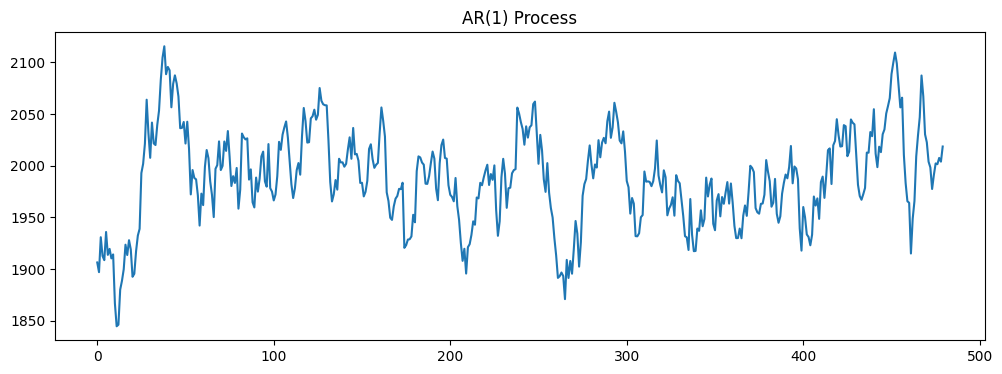

In [18]:
plt.figure(figsize=(12, 4))
plt.plot(AR1_500_q6[21:])
plt.title('AR(1) Process')
plt.show()

### <span style="color:RED">6.b: Plot the Auto-Correlation Function</span>

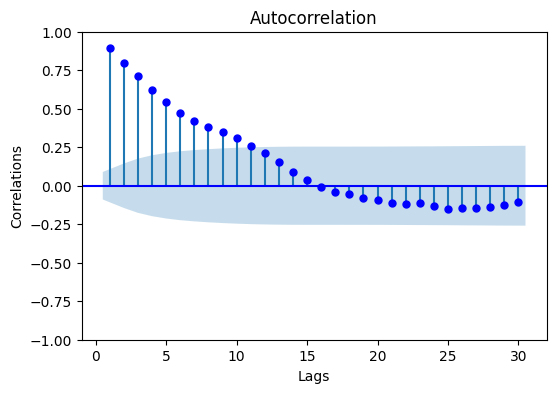

In [19]:
DS.plot_autocorrelation(AR1_500_q6[21:])

### <span style="color:RED">7: Generate 500 realizations from an AR-1 process Yt = 200 + −0.9Yt−1 + εt</span>

In [20]:
np.random.seed(123)
AR1_500_q7_phi_list = [-0.9]
AR1_500_q7 = DS.generate_AR_process(200, AR1_500_q7_phi_list, errors=np.random.normal(0, 20, 501), lenght_of_series=500)

### <span style="color:RED">7.a: Plot the generated observations</span>

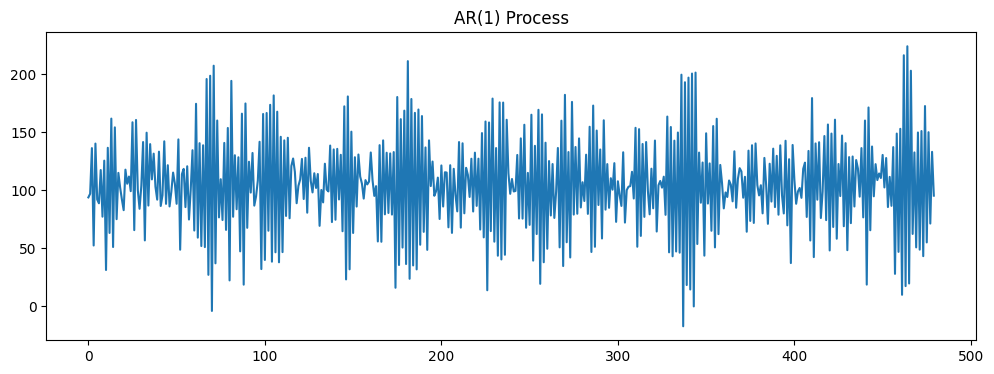

In [21]:
plt.figure(figsize=(12, 4))
plt.plot(AR1_500_q7[21:])
plt.title('AR(1) Process')
plt.show()

### <span style="color:RED">7.b: Plot the Auto-Correlation Function</span>

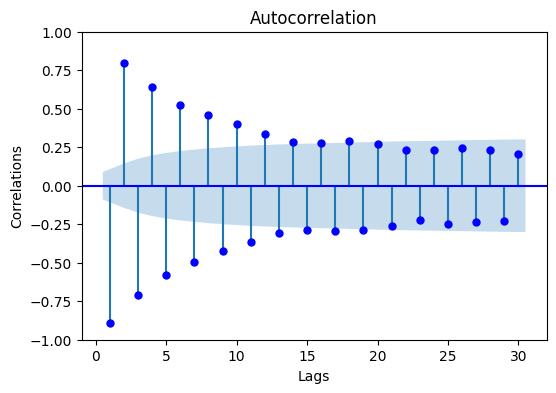

In [22]:
DS.plot_autocorrelation(AR1_500_q7[21:])

### <span style="color:RED">8: Generate 500 realizations from an MA-1 process Yt = 200 + (0.9)εt−1 + εt</span>

In [23]:
MA1_500_q8_theta_list = [0.9]
np.random.seed(123)
MA1_500_q8 = DS.generate_MA_process(200, MA1_500_q8_theta_list, errors=np.random.normal(0, 20, 501), lenght_of_series=500)

### <span style="color:RED">8.a: Plot the generated observations</span>

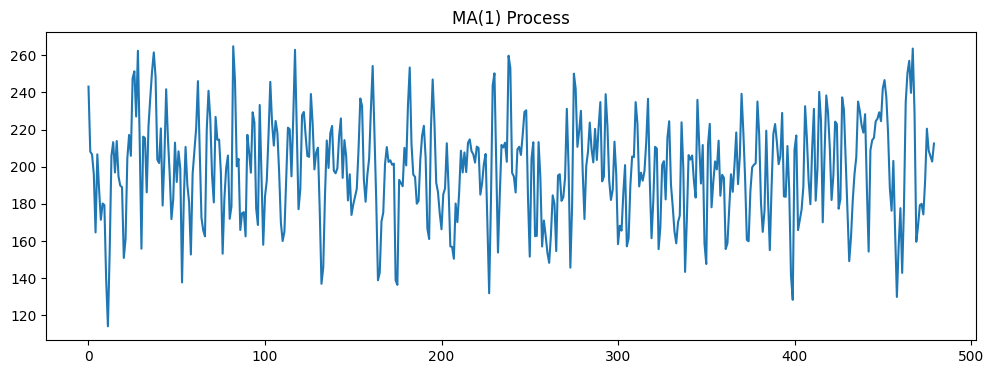

In [24]:
plt.figure(figsize=(12, 4))
plt.plot(MA1_500_q8[21:])
plt.title('MA(1) Process')
plt.show()

### <span style="color:RED">8.b: Plot the Auto-Correlation Function</span>

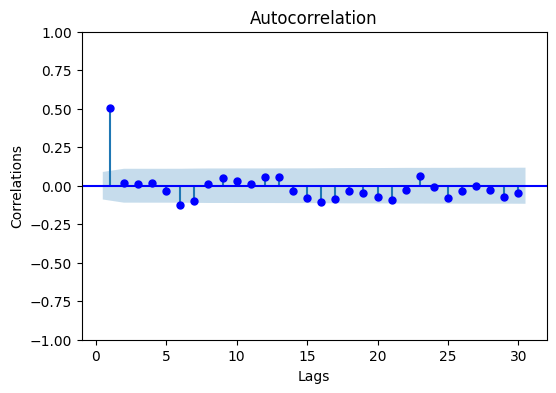

In [25]:
DS.plot_autocorrelation(MA1_500_q8[21:])

### <span style="color:RED">9: Australian Beer Production data</span>

In [26]:
AUSBEERDATA = pd.read_csv('ausbeer.csv', header=None)
AUSBEERDATA.columns = ['Month', 'Beer']
BEER_MONTH = AUSBEERDATA['Month'].values
BEER = AUSBEERDATA['Beer'].values

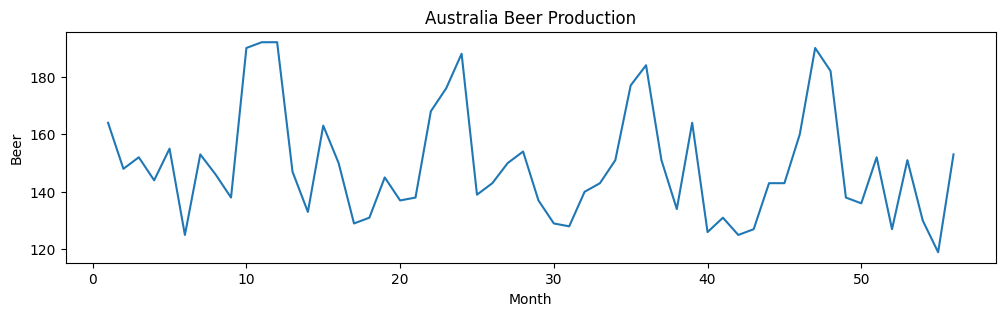

In [27]:
plt.figure(figsize=(12, 3))
plt.plot(BEER_MONTH, BEER)
plt.xlabel('Month')
plt.ylabel('Beer')
plt.title('Australia Beer Production')
plt.show()

### <span style="color:RED">9.a: Plot the Auto-Correlation Function of the original series</span>

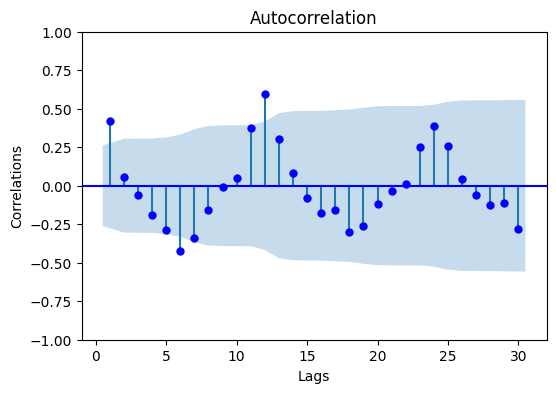

In [28]:
DS.plot_autocorrelation(BEER)

### <span style="color:RED">9.b: Plot the Auto-Correlation Function of the deasonalized series</span>

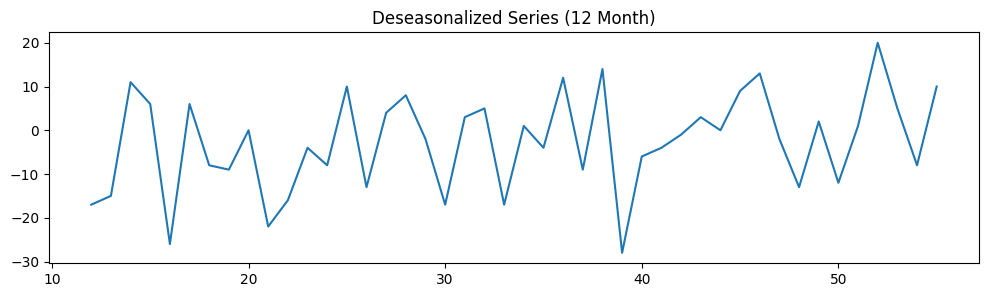

In [29]:
BEER_DEASEASONALIZED_12MONTH = DS.deseasonalize_series(BEER, 12)

plt.figure(figsize=(12, 3))
plt.plot(BEER_DEASEASONALIZED_12MONTH)
plt.title('Deseasonalized Series (12 Month)')
plt.show()


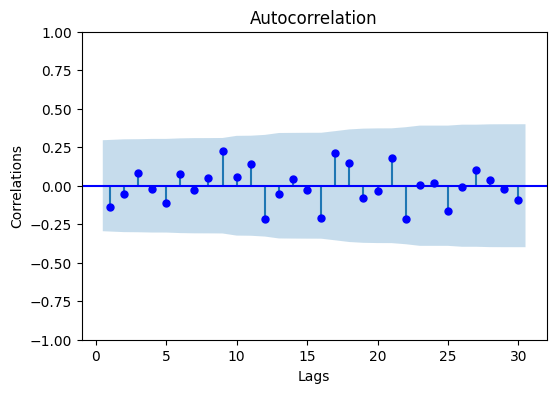

In [30]:
DS.plot_autocorrelation(BEER_DEASEASONALIZED_12MONTH[12:])

### <span style="color:RED">10.c: Implement an exponentially smoothed seasonal(12) difference</span>

In [31]:
BEER_ES07 = DS.ES_forecast_for_all_data(BEER, 0.7, 12)

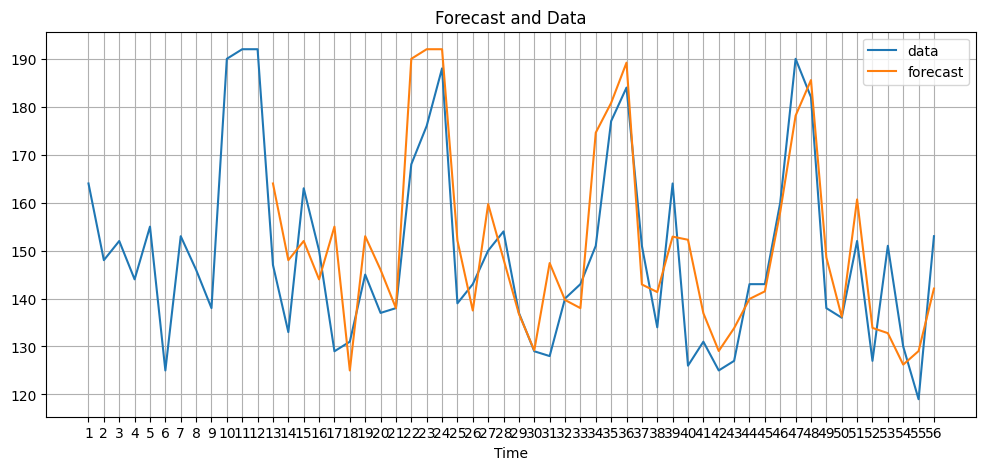

Error Summary
-------------
MAE: 8.9234
MAPE: 6.1748
MSE: 127.5770
RMSE: 11.2950


In [32]:
DS.plot_forecasts(BEER, BEER_MONTH, BEER_ES07)
DS.print_error_summary(BEER, BEER_ES07, MAE=DS.MAE, MAPE=DS.MAPE, MSE=DS.MSE, RMSE=DS.RMSE)

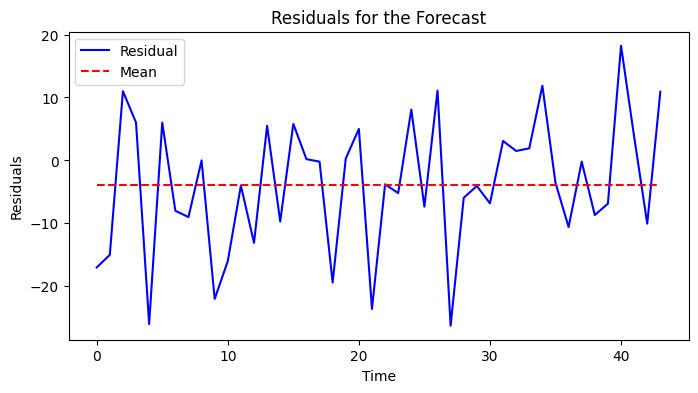

Mean of Residual:   -3.9117
S.D. of Residual:   10.7185
Half Width :        3.2587   (degree of freedom = 43, Confidence Level = 0.95)
p-value :           0.0198


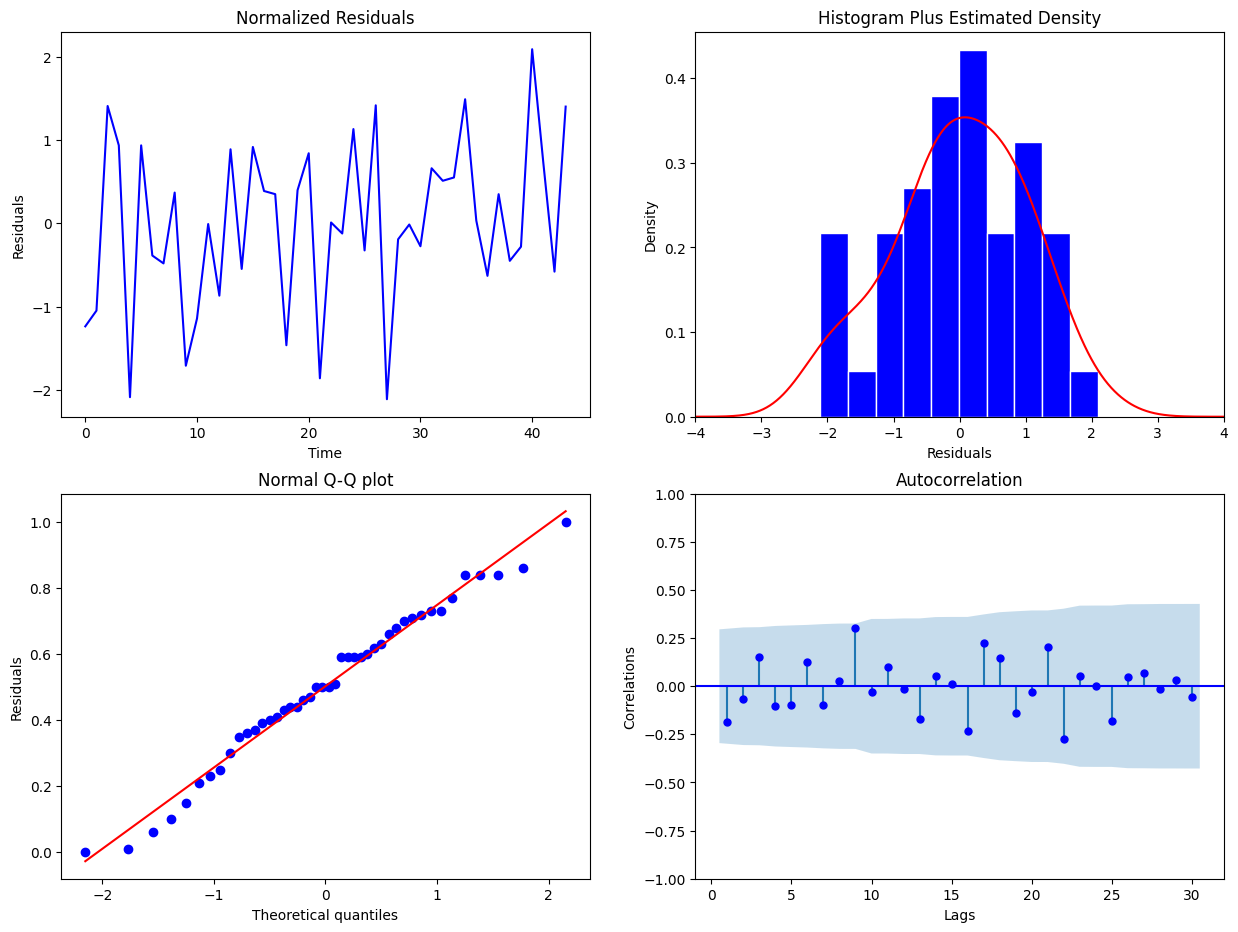

In [33]:
BEER_ES07_ERRORS = DS.get_all_residuals(BEER, BEER_ES07)

DS.plot_resids(BEER_ES07_ERRORS)
DS.print_resids_summary(BEER_ES07_ERRORS)

DS.show_all_normalized_resids_plots(BEER_ES07_ERRORS)

### <span style="color:RED">10: Generate 500 realizations from an AR-2 process </span>

In [34]:
np.random.seed(123)
AR2_process = DS.generate_AR_process(200, [0.5, 0.4], errors=np.random.normal(0, 20, 501), lenght_of_series=500)

### <span style="color:RED">10.a: Plot the generated observations</span>

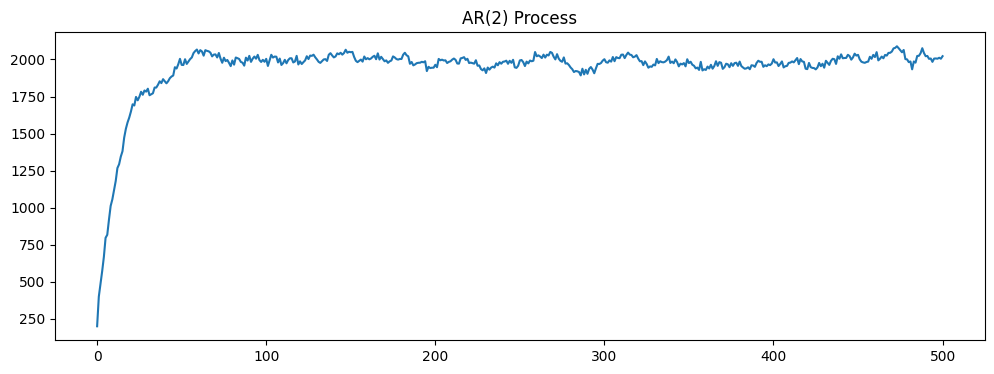

In [35]:
plt.figure(figsize=(12, 4))
plt.plot(AR2_process)
plt.title('AR(2) Process')
plt.show()

### <span style="color:RED">10.b: Plot the Auto-Correlation Function</span>

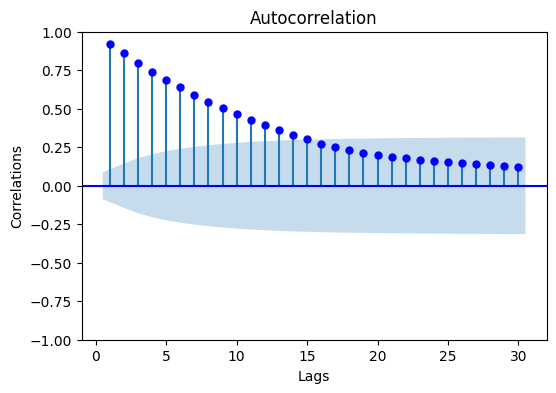

In [36]:
DS.plot_autocorrelation(AR2_process)

### <span style="color:RED">11: Generate 500 realizations from an MA process </span>

In [37]:
np.random.seed(123)
MA_process = DS.generate_MA_process(200, [0, 0.8], errors=np.random.normal(0, 20, 501), lenght_of_series=500)

### <span style="color:RED">11.a: Plot the generated observations</span>

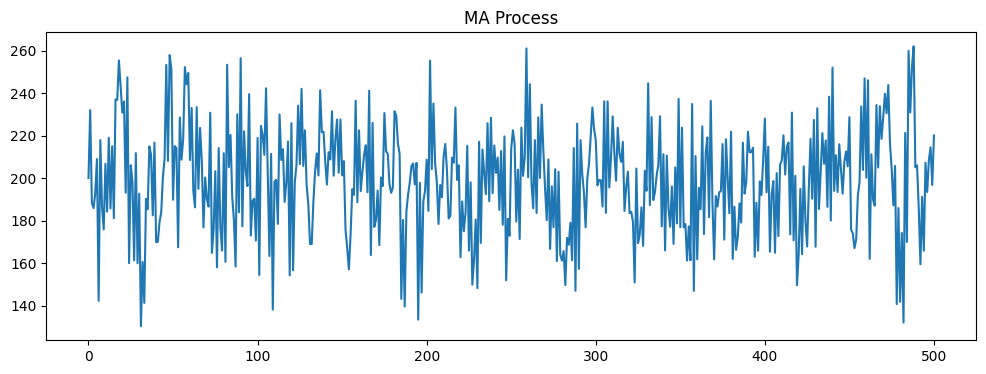

In [38]:
plt.figure(figsize=(12, 4))
plt.plot(MA_process)
plt.title('MA Process')
plt.show()

### <span style="color:RED">11.b: Plot the Auto-Correlation Function</span>

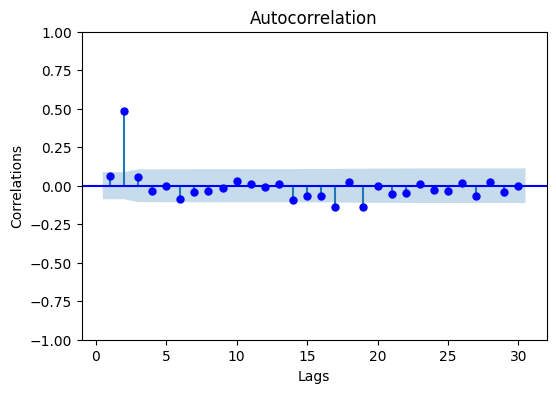

In [39]:
DS.plot_autocorrelation(MA_process)

### <span style="color:RED">12.a: Plot the Auto-Correlation Function of the original series</span>

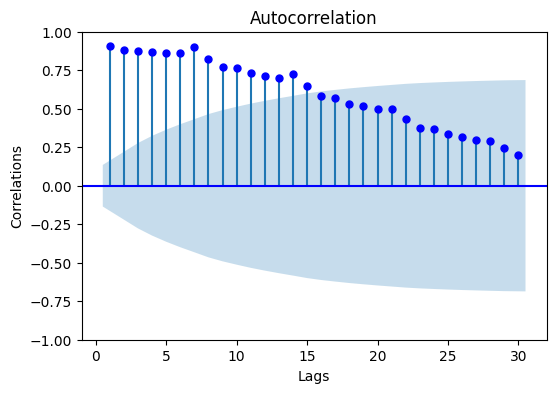

In [40]:
DS.plot_autocorrelation(CASES)

### <span style="color:RED">12.b: Plot the Auto-Correlation Function of the logged series</span>

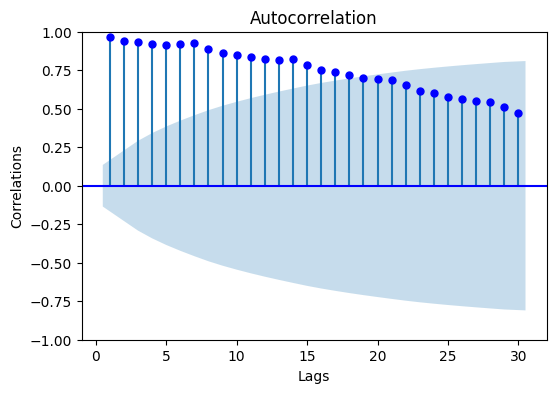

In [41]:
DS.plot_autocorrelation(CASES_LOG)

### <span style="color:RED">12.c: Plot the Auto-Correlation Function of the deasonalized and logged series</span>

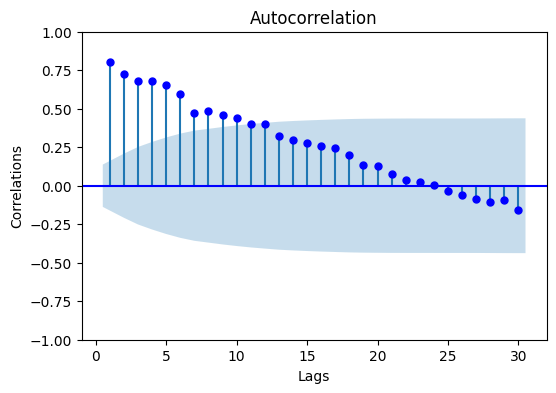

In [42]:
DS.plot_autocorrelation(CASES_LOG_DEASEASONALIZED_1WEEK[7:])